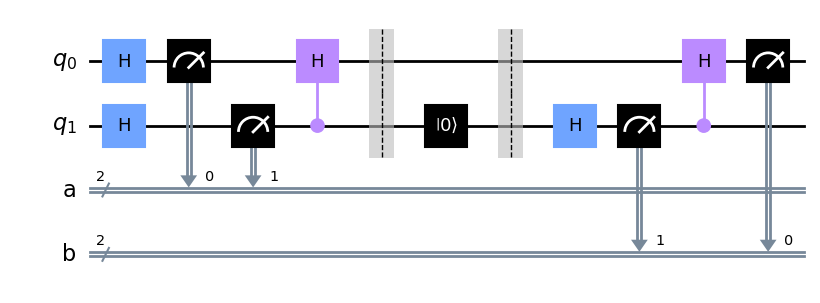

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer
#from qiskit.providers.aer import QasmSimulator
from numpy import pi

qr = QuantumRegister(2, 'q')
cra = ClassicalRegister(2, 'a')
crb = ClassicalRegister(2, 'b')
backend = BasicAer.get_backend('qasm_simulator')
circuit = QuantumCircuit(qr, cra, crb)

#--- Alice ------------------------------
circuit.h(qr[0])
circuit.h(qr[1])
circuit.measure(qr[0], cra[0])
circuit.measure(qr[1], cra[1])
circuit.ch(qr[1], qr[0])
circuit.barrier()
#----------------------------------------

circuit.reset(qr[1])

#--- Bob --------------------------------
circuit.barrier()
circuit.h(qr[1])
circuit.measure(qr[1], crb[1])
circuit.ch(qr[1], qr[0])
circuit.measure(qr[0], crb[0])
#----------------------------------------

circuit.draw('mpl')

In [2]:
result = execute(circuit, backend, shots=1).result().get_counts()
print (result)

{'00 10': 1}
